In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from scipy.stats import f_oneway

# Helper Functions

In [23]:
def process_and_average(arr):
    temp1 = arr["Theta_AF7"]
    temp2 = arr["Theta_AF8"]
    temp1.dropna(axis = 0, inplace=True)
    temp2.dropna(axis = 0, inplace=True)
    return ( temp1 + temp2 ) / 2

In [24]:
control = []
for i in range(1,4):
    control.append(pd.read_csv('Control/'+str(i)+'.csv'))
print(control)

[                   TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-09-20 15:29:35.610        NaN        NaN        NaN         NaN   
1    2024-09-20 15:29:36.613   1.338344  -0.015699   0.243554    1.234289   
2    2024-09-20 15:29:37.613   0.767648  -0.137469   0.145669    0.974176   
3    2024-09-20 15:29:38.617   0.670623  -0.133145   0.211959    0.969150   
4    2024-09-20 15:29:39.596        NaN        NaN        NaN         NaN   
..                       ...        ...        ...        ...         ...   
240  2024-09-20 15:33:01.604   0.044104  -0.292977  -0.310413   -0.051832   
241  2024-09-20 15:33:02.604   0.191318   0.124686   0.128322    0.214605   
242  2024-09-20 15:33:03.605   0.758338   0.503489   0.453126    0.524626   
243  2024-09-20 15:33:04.605   0.534048   0.199007   0.601026    0.798300   
244  2024-09-20 15:33:05.614   0.123609  -0.254580  -0.140539    0.456318   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X

In [25]:
easy = []
for i in range(1,4):
    easy.append(pd.read_csv('Easy/'+str(i)+'.csv'))
print(easy)

[                  TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0   2024-09-20 15:38:48.871        NaN        NaN        NaN         NaN   
1   2024-09-20 15:38:48.924        NaN        NaN        NaN         NaN   
2   2024-09-20 15:38:49.872   0.399119  -0.255727   0.646373    0.471183   
3   2024-09-20 15:38:50.872   0.348593  -0.274730  -0.036774    0.279549   
4   2024-09-20 15:38:51.872   0.410673  -0.374059  -0.401192    0.341828   
..                      ...        ...        ...        ...         ...   
61  2024-09-20 15:39:46.874   0.257149   0.118457   0.189873    0.492791   
62  2024-09-20 15:39:47.870   0.087595   0.250219   0.269140    0.360643   
63  2024-09-20 15:39:48.870  -0.051509  -0.321525  -0.339632   -0.258673   
64  2024-09-20 15:39:49.880   0.216326  -0.130951  -0.137059    0.213711   
65  2024-09-20 15:39:50.870   0.393367  -0.049746   0.254333    0.500190   

    Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X  \
0        

In [26]:
medium = []
for i in range(1,4):
    medium.append(pd.read_csv('Medium/'+str(i)+'.csv'))
print(medium)

[                   TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-09-20 15:33:57.887        NaN        NaN        NaN         NaN   
1    2024-09-20 15:33:58.887   0.040558   0.011330   0.230926    0.515624   
2    2024-09-20 15:33:59.377        NaN        NaN        NaN         NaN   
3    2024-09-20 15:33:59.888  -0.255673   0.161477   0.266590    0.362506   
4    2024-09-20 15:34:00.891  -0.113135   0.489301  -0.050137   -0.239626   
..                       ...        ...        ...        ...         ...   
98   2024-09-20 15:35:28.884  -0.033086   0.071559   0.043151   -0.702505   
99   2024-09-20 15:35:29.885  -0.057095  -0.452308  -0.171572   -0.251154   
100  2024-09-20 15:35:30.885   0.095847  -0.503221   0.035521    0.228310   
101  2024-09-20 15:35:31.885   0.576129  -0.302652  -0.022796    0.560503   
102  2024-09-20 15:35:32.885   0.963679  -0.085053   0.098028    1.052465   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X

In [27]:
hard = []
for i in range(1,4):
    hard.append(pd.read_csv('Hard/'+str(i)+'.csv'))
print(hard)

[                   TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-09-20 15:42:24.653        NaN        NaN        NaN         NaN   
1    2024-09-20 15:42:25.052        NaN        NaN        NaN         NaN   
2    2024-09-20 15:42:25.654   0.380378  -0.406960   0.486066    0.494631   
3    2024-09-20 15:42:26.658   0.776368   0.183060   0.592787    0.539242   
4    2024-09-20 15:42:27.263        NaN        NaN        NaN         NaN   
..                       ...        ...        ...        ...         ...   
136  2024-09-20 15:44:27.649  -0.250017  -0.345865  -0.182283   -0.175787   
137  2024-09-20 15:44:28.649   0.351835   0.012129   0.192153    0.196501   
138  2024-09-20 15:44:29.651   0.592356   0.033449   0.414380    0.689427   
139  2024-09-20 15:44:29.676        NaN        NaN        NaN         NaN   
140  2024-09-20 15:44:30.654   0.599848  -0.062024   0.323528    0.854972   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X

In [28]:
extreme = []
for i in range(1,4):
    extreme.append(pd.read_csv('Extreme/'+str(i)+'.csv'))
print(extreme)

[                   TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-09-20 15:36:09.334        NaN        NaN        NaN         NaN   
1    2024-09-20 15:36:10.346  -0.141164  -0.124128   0.147903    0.223566   
2    2024-09-20 15:36:10.442        NaN        NaN        NaN         NaN   
3    2024-09-20 15:36:11.335  -0.128259  -0.003550   0.108307   -0.248061   
4    2024-09-20 15:36:12.335  -0.128259   0.173081   0.307980   -0.248061   
..                       ...        ...        ...        ...         ...   
140  2024-09-20 15:38:18.332        NaN        NaN        NaN         NaN   
141  2024-09-20 15:38:18.332   1.101956   0.464683   0.521194    0.674663   
142  2024-09-20 15:38:19.166        NaN        NaN        NaN         NaN   
143  2024-09-20 15:38:19.331   1.101956   0.595770   1.016870    0.674663   
144  2024-09-20 15:38:20.331   1.101956   0.439035   0.540888    0.674663   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X

# Looking at Theta Values

Text(0, 0.5, 'Power [dB]')

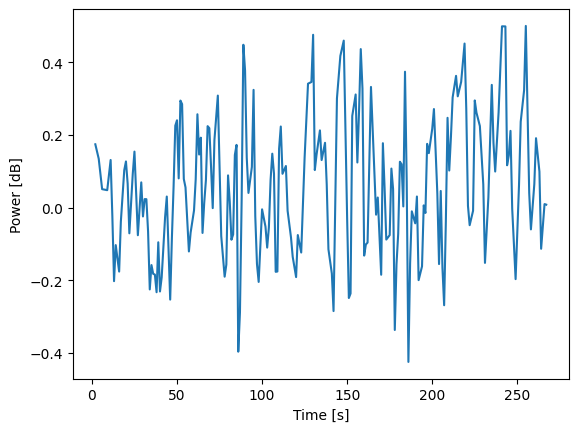

In [29]:
control_theta = []
for i in range(1,4):

    temp_af7 = control[i-1]["Theta_AF7"]
    temp_af8 = control[i-1]["Theta_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)
    # temp_af7 = rescale(temp_af7)
    # temp_af8 = rescale(temp_af8)

    # print(temp_af7)
    # print(temp_af8)
    avg = ( temp_af7 + temp_af8 ) / 2
    control_theta.append(avg)

plt.plot(control_theta[1])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

In [ ]:
easy_theta = []
for i in range(1,4):

    temp_af7 = easy[i-1]["Theta_AF7"]
    temp_af8 = easy[i-1]["Theta_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)
    # temp_af7 = rescale(temp_af7)
    # temp_af8 = rescale(temp_af8)

    # print(temp_af7)
    # print(temp_af8)
    avg = ( temp_af7 + temp_af8 ) / 2
    easy_theta.append(avg)

plt.plot(easy_theta[2])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

In [ ]:
medium_theta = []
for i in range(1,4):

    temp_af7 = medium[i-1]["Theta_AF7"]
    temp_af8 = medium[i-1]["Theta_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)
    # temp_af7 = rescale(temp_af7)
    # temp_af8 = rescale(temp_af8)

    # print(temp_af7)
    # print(temp_af8)
    avg = ( temp_af7 + temp_af8 ) / 2
    medium_theta.append(avg)

plt.plot(medium_theta[0])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

In [ ]:
hard_theta = []
for i in range(1,4):

    temp_af7 = hard[i-1]["Theta_AF7"]
    temp_af8 = hard[i-1]["Theta_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)
    # temp_af7 = rescale(temp_af7)
    # temp_af8 = rescale(temp_af8)

    # print(temp_af7)
    # print(temp_af8)
    avg = ( temp_af7 + temp_af8 ) / 2
    hard_theta.append(avg)

plt.plot(hard_theta[1])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

In [ ]:
extreme_theta = []
for i in range(1,4):

    temp_af7 = extreme[i-1]["Theta_AF7"]
    temp_af8 = extreme[i-1]["Theta_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)
    # temp_af7 = rescale(temp_af7)
    # temp_af8 = rescale(temp_af8)

    # print(temp_af7)
    # print(temp_af8)
    avg = ( temp_af7 + temp_af8 ) / 2
    extreme_theta.append(avg)

plt.plot(extreme_theta[1])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

In [16]:
def power(arr):
    temp = np.square(arr)
    sum = np.sum(temp)
    return (1/len(arr))*sum
    

In [ ]:
power_hard = []
power_medium = []
power_easy = []
power_extreme = []
power_control = []
for i in range(1,4):
    power_hard.append(np.average(hard_theta[i-1]))
    power_medium.append(np.average(medium_theta[i-1]))
    power_easy.append(np.average(easy_theta[i-1]))
    power_extreme.append(np.average(extreme_theta[i-1]))
    power_control.append(np.average(control_theta[i-1]))

print(power_extreme)
print(power_hard)
print(power_medium)
print(power_easy)
print(power_control)

In [ ]:
# Anova Test
f_oneway(power_control, power_easy, power_medium, power_hard, power_extreme)

#### p < 0.05, YAY STATISTICAL DIFFERENCE

# Looking at Alpha Levels


In [ ]:
control_alpha = []
for i in range(1,4):

    temp_af7 = control[i-1]["Alpha_AF7"]
    temp_af8 = control[i-1]["Alpha_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)

    avg = ( temp_af7 + temp_af8 ) / 2
    control_alpha.append(avg)

easy_alpha = []
for i in range(1,4):

    temp_af7 = easy[i-1]["Alpha_AF7"]
    temp_af8 = easy[i-1]["Alpha_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)

    avg = ( temp_af7 + temp_af8 ) / 2
    easy_alpha.append(avg)

medium_alpha = []
for i in range(1,4):

    temp_af7 = medium[i-1]["Alpha_AF7"]
    temp_af8 = medium[i-1]["Alpha_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)

    avg = ( temp_af7 + temp_af8 ) / 2
    medium_alpha.append(avg)

hard_alpha = []
for i in range(1,4):

    temp_af7 = hard[i-1]["Alpha_AF7"]
    temp_af8 = hard[i-1]["Alpha_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)

    avg = ( temp_af7 + temp_af8 ) / 2
    hard_alpha.append(avg)

extreme_alpha = []
for i in range(1,4):

    temp_af7 = extreme[i-1]["Alpha_AF7"]
    temp_af8 = extreme[i-1]["Alpha_AF8"]
    temp_af7.dropna(axis = 0, inplace=True)
    temp_af8.dropna(axis = 0, inplace=True)

    avg = ( temp_af7 + temp_af8 ) / 2
    extreme_alpha.append(avg)